# 第3章 数据的描述统计量

## 初始化

In [1]:
# 本章需要用到的库
import numpy as np # 导入numpy库
import pandas as pd # 导入pandas库
from scipy import stats # 导入scipy库stats模块
import matplotlib.pyplot as plt # 导入matplotlib库
import seaborn as sns # 导入seaborn库

# 设置初始化
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

## 3.1 描述水平的统计量

### 3.1.1 平均数

In [2]:
example3_1 = pd.read_csv('./pydata/chap03/example3_1.csv', encoding='gbk') # 读取数据
example3_1.head() # 显示前5行数据

,分数
0,85
1,55
2,91
3,66
4,79


In [3]:
pd.DataFrame.mean(example3_1) # 计算均值

分数    80.0
dtype: float64

In [4]:
example3_1.mean() # 计算均值

分数    80.0
dtype: float64

In [5]:
np.mean(example3_1) # 计算均值 numpy库

80.0

In [9]:
example3_2 = pd.read_csv('./pydata/chap03/example3_2.csv', encoding='gbk') # 读取数据
example3_2 # 显示数据

,分组,组中值,人数
0,60以下,55,3
1,60~70,65,4
2,70~80,75,4
3,80~90,85,10
4,90~100,95,9


In [10]:
m = example3_2['组中值']
f = example3_2['人数']
np.average(m, weights=f) # 计算加权平均数

81.0

### 3.1.2 分位数

In [24]:
example3_1.median() # 计算中位数

分数    85.0
dtype: float64

In [22]:
pd.DataFrame.quantile(example3_1, q=[0.25, 0.75], interpolation='linear') # 计算四分位数 线性插值

,分数
0.25,70.5
0.75,90.0


In [26]:
pd.DataFrame.quantile(example3_1, q=[0.1, 0.25, 0.5, 0.75, 0.9], interpolation='linear') # 计算百分位数 线性插值

,分数
0.10,60.4
0.25,70.5
0.50,85.0
0.75,90.0
0.90,92.3


### 3.1.3 众数

In [27]:
example3_1.mode() # 计算众数

,分数
0,86


## 3.2 描述差异的统计量

### 3.2.1 极差和四分位差

In [31]:
R = example3_1['分数'].max() - example3_1['分数'].min() # 计算极差
print('极差:', R)

极差: 47


In [32]:
IQR = example3_1['分数'].quantile(0.75) - example3_1['分数'].quantile(0.25) # 计算四分位差
print('IQR:', IQR)

IQR: 19.5


### 3.2.2 方差和标准差

In [33]:
var = example3_1['分数'].var(ddof=1) # 计算方差 样本方差 ddof=1
print('方差:', var)

方差: 174.6206896551724


In [34]:
sd = example3_1['分数'].std(ddof=1) # 计算标准差 样本标准差 ddof=1
print('标准差:', sd)

标准差: 13.214412194841374


### 3.2.3 变异系数

In [37]:
example2_3 = pd.read_csv('./pydata/chap02/example2_3.csv', encoding='gbk') # 读取数据
example2_3 = example2_3.set_index('日期') # 将日期设置为索引
example2_3.head() # 显示前5行数据

,北京,上海,郑州,武汉,西安,沈阳
日期,,,,,,
2020/1/1,62,54,73,73,117,109
2020/1/2,80,82,124,105,149,214
2020/1/3,82,72,192,130,209,204
2020/1/4,74,88,249,142,252,207
2020/1/5,83,63,276,80,152,198


In [38]:
s_mean = example2_3.mean() # 计算均值
s_sd = example2_3.std() # 计算标准差
s_cv = s_sd / s_mean # 计算变异系数
df = pd.DataFrame({'平均数': s_mean, '标准差': s_sd, '变异系数': s_cv}) # 创建数据框
np.round(df, 4) # 保留4位小数

,平均数,标准差,变异系数
北京,78.4454,41.6278,0.5307
上海,67.9399,28.9772,0.4265
郑州,98.9071,42.7207,0.4319
武汉,72.1530,30.3549,0.4207
西安,91.7896,45.7087,0.4980
沈阳,78.5710,40.6698,0.5176


### 3.2.4 标准分数

In [39]:
example3_1 = pd.read_csv('./pydata/chap03/example3_1.csv', encoding='gbk') # 读取数据
example3_1.head() # 显示前5行数据

,分数
0,85
1,55
2,91
3,66
4,79


In [43]:
z = stats.zscore(example3_1['分数'], ddof=1) # 计算标准分数
np.round(z, 4) # 保留4位小数

0     0.3784
1    -1.8919
2     0.8324
3    -1.0594
4    -0.0757
5     1.2865
6     0.9081
7    -1.8919
8     0.5297
9     0.7567
10    0.2270
11   -0.7567
12    1.2108
13   -0.6054
14    0.7567
15   -1.4378
16    0.4540
17    0.4540
18    0.9081
19    0.3784
20   -0.9838
21    0.0757
22    0.6811
23   -2.2702
24    1.1351
25    0.4540
26   -0.3784
27    0.8324
28    0.1513
29   -1.0594
Name: 分数, dtype: float64

## 3.3 描述分布形状的统计量

### 3.3.1 偏度系数

In [44]:
example3_1 = pd.read_csv('./pydata/chap03/example3_1.csv', encoding='gbk') # 读取数据
example3_1.head() # 显示前5行数据

,分数
0,85
1,55
2,91
3,66
4,79


In [47]:
skew = example3_1['分数'].skew() # 计算偏度系数
print('偏度系数:', round(skew, 4))

偏度系数: -0.8314


### 3.3.2 峰度系数

In [48]:
kurt = example3_1['分数'].kurt() # 计算峰度系数
print('峰度系数:', round(kurt, 4))

峰度系数: -0.3515


## 3.4 一个综合描述的例子

In [50]:
example3_12 = pd.read_csv('./pydata/chap03/example3_12.csv', encoding='gbk') # 读取数据
example3_12.head() # 显示前5行数据

,性别,家庭所在地,月生活费支出
0,女,中小城市,1500
1,男,大型城市,2000
2,男,大型城市,1800
3,女,中小城市,1600
4,女,中小城市,2000


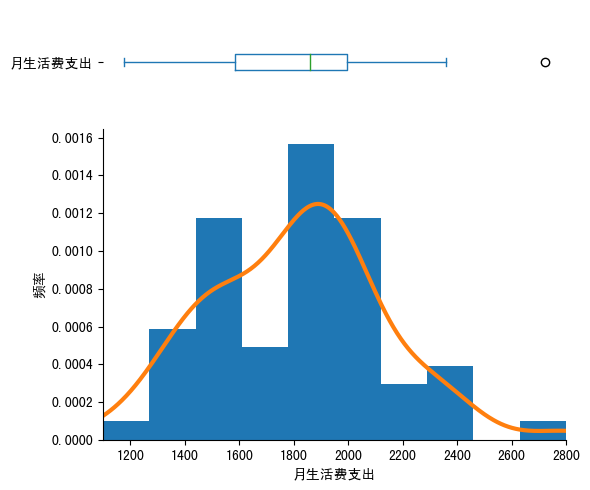

In [51]:
# 月生活费支出的直方图和箱型图
x = example3_12['月生活费支出']

fig = plt.figure(figsize=(6, 5)) # 设置画布大小
spec = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[1, 3]) # 设置子图网格

ax1 = fig.add_subplot(spec[0, :]) # 创建子图1
x.plot(kind='box', ax=ax1, vert=False) # 绘制箱线图
ax1.spines['right'].set_color('none') # 去掉右边框
ax1.spines['top'].set_color('none') # 去掉上边框
ax1.spines['left'].set_color('none') # 去掉左边框
ax1.spines['bottom'].set_color('none') # 去掉下边框
ax1.set_xticks([]) # 去掉x轴刻度

ax2 = fig.add_subplot(spec[1, :]) # 创建子图2
x.plot(kind='hist', bins=10, ax=ax2, density=True, legend=False) # 绘制直方图
x.plot(kind='density', ax=ax2, linewidth=3) # 绘制核密度图
ax2.set_xlabel('月生活费支出') # 设置x轴标签
ax2.set_ylabel('频率') # 设置y轴标签
ax2.set_xlim(x.min(), x.max()) # 设置x轴范围
ax2.spines['right'].set_color('none') # 去掉右边框
ax2.spines['top'].set_color('none') # 去掉上边框

plt.tight_layout() # 设置子图间距
plt.show() # 显示图形

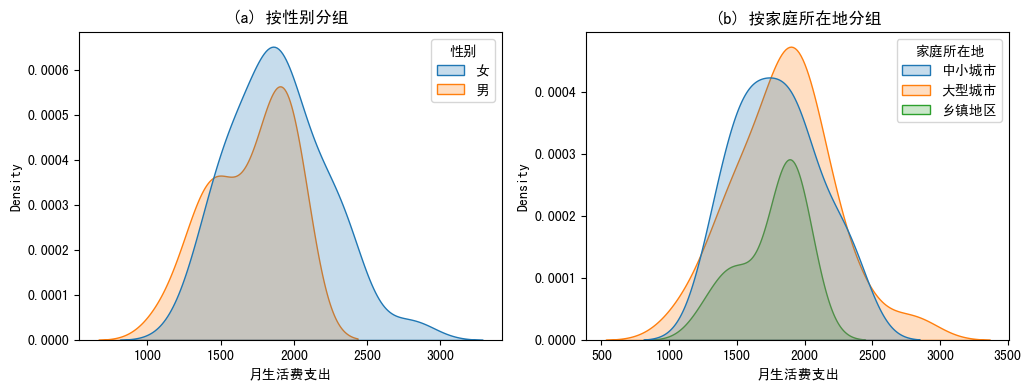

In [52]:
# 按性别和家庭所在地分组绘制核密度图
plt.figure(figsize=(12, 4)) # 设置画布大小

plt.subplot(1, 2, 1) # 创建子图1
sns.kdeplot(x='月生活费支出', hue='性别', data=example3_12, fill=True) # 绘制核密度图
plt.title('(a) 按性别分组') # 设置标题

plt.subplot(1, 2, 2) # 创建子图2
sns.kdeplot(x='月生活费支出', hue='家庭所在地', data=example3_12, fill=True) # 绘制核密度图
plt.title('(b) 按家庭所在地分组') # 设置标题

plt.show() # 显示图形

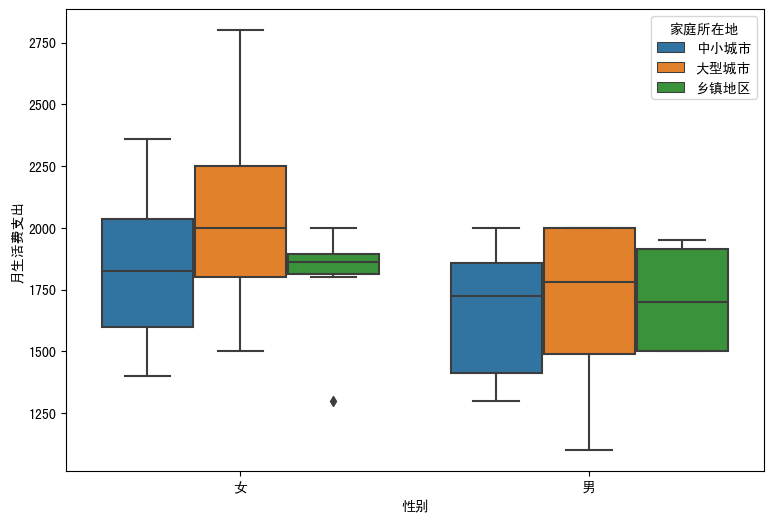

In [53]:
# 按性别和家庭所在地分组绘制箱型图
plt.figure(figsize=(9, 6)) # 设置画布大小
sns.boxplot(x='性别', y='月生活费支出', hue='家庭所在地', data=example3_12) # 绘制箱型图
plt.show()

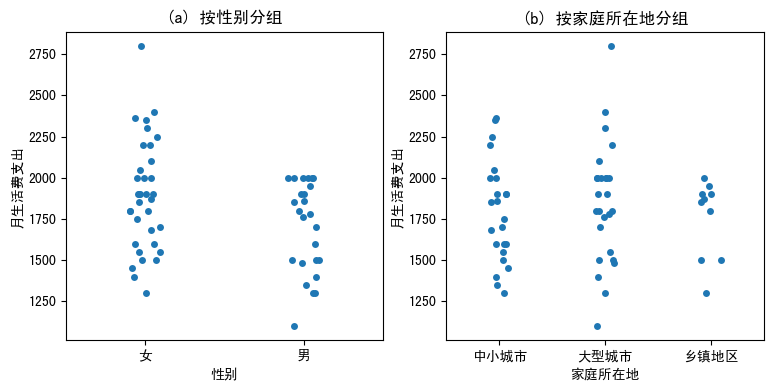

In [55]:
# 按性别和家庭所在地分组绘制点图
plt.figure(figsize=(9, 4)) # 设置画布大小

plt.subplot(121) # 创建子图1
sns.stripplot(
    x='性别', y='月生活费支出', data=example3_12, 
    jitter=True, size=5
) # 绘制点图
plt.title('(a) 按性别分组') # 设置标题

plt.subplot(122) # 创建子图2
sns.stripplot(
    x='家庭所在地', y='月生活费支出', data=example3_12,
    jitter=True, size=5
) # 绘制点图
plt.title('(b) 按家庭所在地分组') # 设置标题

plt.show() # 显示图形

In [56]:
tab = pd.pivot_table(
    example3_12, index=['性别'], columns=['家庭所在地'],
    margins=True, margins_name='合计', aggfunc=len
) # 创建透视表
tab

月生活费支出              
家庭所在地   中小城市 乡镇地区 大型城市  合计
性别                        
女         18    6   11  35
男          6    4   15  25
合计        24   10   26  60

In [58]:
desc = example3_12.describe(include=None) # 计算描述统计量 不包括类别变量
print('全部学生支出的概括性描述')
round(desc, 4) # 保留4位小数

全部学生支出的概括性描述


,月生活费支出
count,60.0000
mean,1812.3333
std,320.9962
min,1100.0000
25%,1550.0000
50%,1850.0000
75%,2000.0000
max,2800.0000


In [59]:
tab = pd.pivot_table(
    example3_12, index=['性别', '家庭所在地'], values=['月生活费支出'],
    margins=True, margins_name='合计', aggfunc=[sum, min, max, np.median, np.mean, np.std]
) # 创建透视表
tab

sum    min    max median         mean         std
          月生活费支出 月生活费支出 月生活费支出 月生活费支出       月生活费支出      月生活费支出
性别 家庭所在地                                                      
女  中小城市    33140   1400   2360   1825  1841.111111  308.942959
   乡镇地区    10720   1300   2000   1860  1786.666667  247.521043
   大型城市    22350   1500   2800   2000  2031.818182  383.583581
男  中小城市     9960   1300   2000   1725  1660.000000  290.172363
   乡镇地区     6850   1500   1950   1700  1712.500000  246.221445
   大型城市    25720   1100   2000   1780  1714.666667  293.400425
合计        108740   1100   2800   1850  1812.333333  318.309947

In [60]:
def my_summary(df, col=['性别']):
    df_res = pd.DataFrame()
    df_res['n'] = df.groupby(col)['月生活费支出'].count() # 计算频数
    df_res['平均数'] = df.groupby(col)['月生活费支出'].mean().round(3) # 计算均值
    df_res['中位数'] = df.groupby(col)['月生活费支出'].median() # 计算中位数
    df_res['标准差'] = df.groupby(col)['月生活费支出'].std().round(4) # 计算标准差
    df_res['全距'] = df.groupby(col)['月生活费支出'].apply(lambda x: x.max() - x.min()) # 计算全距
    df_res['变异系数'] = df.groupby(col)['月生活费支出'].apply(lambda x: x.std() / x.mean()) # 计算变异系数
    df_res['偏度系数'] = df.groupby(col)['月生活费支出'].skew() # 计算偏度系数
    return df_res

df1 = my_summary(example3_12, ['性别']) # 计算描述统计量
print('按性别分组')
df1

按性别分组


,n,平均数,中位数,标准差,全距,变异系数,偏度系数
性别,,,,,,,
女,35,1891.714,1900.0,331.1521,1500,0.175054,0.502824
男,25,1701.200,1780.0,275.4893,900,0.161938,-0.548589


In [61]:
df2 = my_summary(example3_12, ['家庭所在地']) # 计算描述统计量
print('按家庭所在地分组')
df2

按家庭所在地分组


,n,平均数,中位数,标准差,全距,变异系数,偏度系数
家庭所在地,,,,,,,
中小城市,24,1795.833,1800.0,308.6565,1060,0.171874,0.269364
乡镇地区,10,1757.000,1860.0,236.0344,700,0.134339,-1.052810
大型城市,26,1848.846,1850.0,364.1354,1700,0.196953,0.321079


In [62]:
df3 = my_summary(example3_12, ['性别', '家庭所在地']) # 计算描述统计量
print('同时按性别和家庭所在地分组')
df3

同时按性别和家庭所在地分组


n       平均数     中位数       标准差    全距      变异系数      偏度系数
性别 家庭所在地                                                          
女  中小城市   18  1841.111  1825.0  308.9430   960  0.167802  0.345656
   乡镇地区    6  1786.667  1860.0  247.5210   700  0.138538 -2.042846
   大型城市   11  2031.818  2000.0  383.5836  1300  0.188788  0.515560
男  中小城市    6  1660.000  1725.0  290.1724   700  0.174803 -0.276271
   乡镇地区    4  1712.500  1700.0  246.2214   450  0.143779  0.035589
   大型城市   15  1714.667  1780.0  293.4004   900  0.171112 -0.763562

## 习题

### 3.1

In [63]:
df = pd.read_csv('./exercise/chap03/exercise3_1.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,网购金额
0,1004
1,921
2,928
3,1148
4,1416


In [66]:
# (1) 计算平均数、标准差、极差和四分位差。
s_mean = df.mean() # 计算均值
s_sd = df.std() # 计算标准差
s_cv = s_sd / s_mean # 计算变异系数
s_R = df.max() - df.min() # 计算极差
s_IQR = df.quantile(0.75) - df.quantile(0.25) # 计算四分位差
df1 = pd.DataFrame({'平均数': s_mean, '标准差': s_sd, '变异系数': s_cv, '极差': s_R, '四分位差': s_IQR}) # 创建数据框
np.round(df1, 4) # 保留4位小数

,平均数,标准差,变异系数,极差,四分位差
网购金额,1032.64,385.3728,0.3732,1981,402.75


In [68]:
# (2) 计算10%、25%、50%、75%和90%的分位数。
df2 = pd.DataFrame.quantile(df, q=[0.1, 0.25, 0.5, 0.75, 0.9], interpolation='linear') # 计算百分位数 线性插值
np.round(df2, 2) # 保留2位小数

,网购金额
0.10,565.80
0.25,838.50
0.50,985.50
0.75,1241.25
0.90,1482.10


In [73]:
# (3) 计算标准分数，检测数据的离群点。
df3 = stats.zscore(df, ddof=1) # 计算标准分数
np.round(df3, 4) # 保留4位小数

,网购金额
0,-0.0743
1,-0.2897
2,-0.2715
3,0.2993
4,0.9948
5,-1.1175
6,-0.1106
7,0.2656
8,-0.4039
9,0.9014


通过标准分数可以找出离群值，一般而言3个标准差以外的值就可以认为是离群值。
- 比如上面的第14个数据（索引为13），它的标准分数为3.2108，大于3，因此可以认为它是离群值。

In [72]:
# (4) 计算偏度系数和峰度系数，分析网购金额的分布特征。
skew = df.skew() # 计算偏度系数
kurt = df.kurt() # 计算峰度系数
df4 = pd.DataFrame({'偏度系数': skew, '峰度系数': kurt}) # 创建数据框
np.round(df4, 4) # 保留4位小数

,偏度系数,峰度系数
网购金额,0.6633,1.2203


网购金额：
- 偏度系数为0.6633，说明网购金额的分布形状是右偏；
- 峰度系数为1.2203，说明网购金额的分布形状是尖峰。

### 3.2

In [21]:
df = pd.read_csv('./exercise/chap03/exercise3_2.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,方法A,方法B,方法C
0,164,129,125
1,167,130,126
2,168,129,126
3,165,130,127
4,170,131,126


In [22]:
df_melt = pd.melt(
    df, value_vars=['方法A', '方法B', '方法C'], 
    var_name='方法', value_name='产品数量'
) # 数据重构
df_melt.head() # 显示前5行数据

,方法,产品数量
0,方法A,164
1,方法A,167
2,方法A,168
3,方法A,165
4,方法A,170


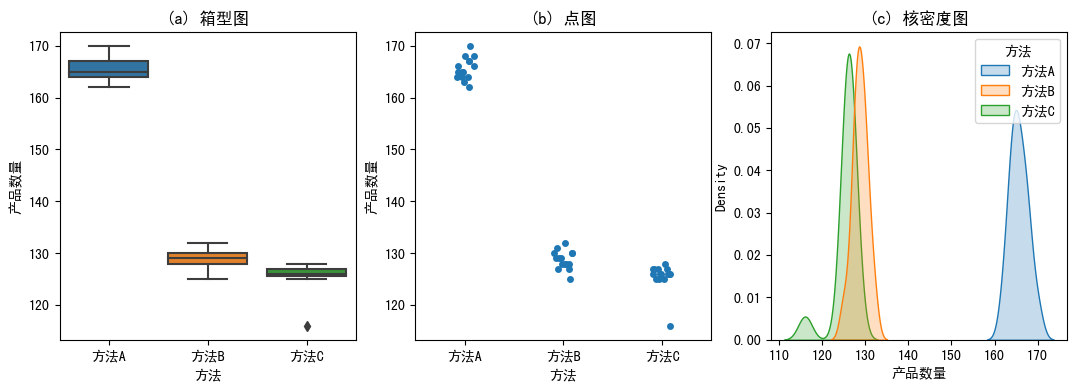

In [23]:
# 选择适当的图形和统计量比较3种方法组装产品数量的分布特点。
# 这里选择箱型图、点图和核密度图
plt.figure(figsize=(13, 4)) # 设置画布大小

plt.subplot(131) # 创建子图1
sns.boxplot(x='方法', y='产品数量', data=df_melt) # 绘制箱型图
plt.title('(a) 箱型图') # 设置标题

plt.subplot(132) # 创建子图2
sns.stripplot(x='方法', y='产品数量', data=df_melt, jitter=True, size=5) # 绘制点图
plt.title('(b) 点图') # 设置标题

plt.subplot(133) # 创建子图3
sns.kdeplot(x='产品数量', hue='方法', data=df_melt, fill=True) # 绘制核密度图
plt.title('(c) 核密度图') # 设置标题

plt.show() # 显示图形

In [24]:
# 除了图形也可以从描述统计量上比较
# 这里选择均值和标准差
df_melt.groupby('方法')['产品数量'].agg([np.mean, np.std]).round(4) # 计算描述统计量

,mean,std
方法,,
方法A,165.6000,2.1314
方法B,128.7333,1.7512
方法C,125.5333,2.7740


从上面的结果可以看出：
- 方法A的平均值明显高于其他两种方法，说明平均产出量最高；
- 并且方法A的标准差略高于方法B，而低于方法C，方法A的稳定性也能接受；
- 综上所述，方法A是最优的。

### 3.3

In [25]:
df = pd.read_csv('./exercise/chap03/exercise3_3.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,男生,女生
0,182.1,175.4
1,183.3,162.7
2,176.6,174.6
3,177.3,164.8
4,174.3,157.0


In [26]:
df_melt = pd.melt(
    df, value_vars=['男生', '女生'],
    var_name='性别', value_name='身高'
) # 数据重构
df_melt.head() # 显示前5行数据

,性别,身高
0,男生,182.1
1,男生,183.3
2,男生,176.6
3,男生,177.3
4,男生,174.3


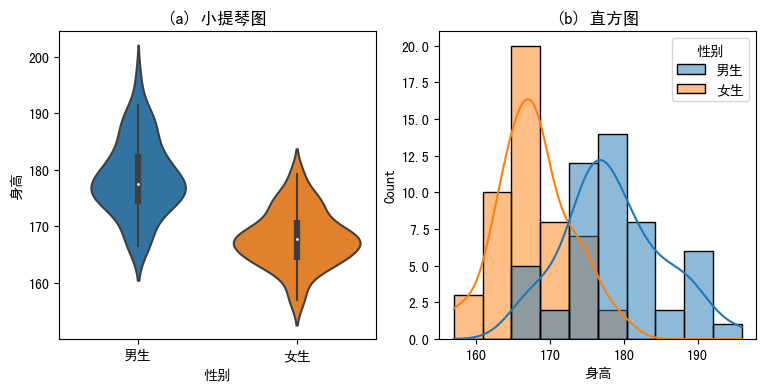

In [27]:
# 利用图形和描述统计量比较分析男女学生身高的特点和差异。
# 这里选择小提琴图和直方图
plt.figure(figsize=(9, 4)) # 设置画布大小

plt.subplot(121) # 创建子图1
sns.violinplot(x='性别', y='身高', data=df_melt) # 绘制小提琴图
plt.title('(a) 小提琴图') # 设置标题

plt.subplot(122) # 创建子图2
sns.histplot(x='身高', hue='性别', data=df_melt, bins=10, kde=True) # 绘制直方图
plt.title('(b) 直方图') # 设置标题

plt.show() # 显示图形

In [28]:
# 除了图形也可以从描述统计量上比较
# 这里选择平均值、极差、变异系数、偏度系数和峰度系数
# 变异系数的函数
def cv(x):
    return x.std() / x.mean()
df_melt.groupby('性别')['身高'].agg([np.mean, np.ptp, cv, stats.skew, stats.kurtosis]).round(4) # 计算描述统计量

,mean,ptp,cv,skew,kurtosis
性别,,,,,
女生,167.856,22.2,0.0294,0.1802,0.0244
男生,178.560,29.5,0.0373,0.3658,-0.1379


从上面的结果可以看出：
- 男生的身高平均值高于女生，但是极差也更大，说明男生的身高差异性较大大；
- 男生身高的变异系数也大于女生，同样反映出男生身高的相对离散程度更大；
- 女生和男生的身高都呈现出右偏分布，但是女生的身高峰度系数更大，呈现尖峰分布。